#### Vivian Xia

## Home Equity Line: Models




## Import packages and data

In [229]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import joblib
!python3 -m pip install "mlxtend~=0.18.0"
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
TARGET_FLAG = 'TARGET_BAD_FLAG'
TARGET_LOSS = 'TARGET_LOSS_AMT'

In [4]:
df = pd.read_csv('clean_HMEQ_Loss.csv')
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLAGE,0.000000,0.000000,0.000000,1.000000,0.000000
M_NINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLNO,0.000000,0.000000,0.000000,1.000000,0.000000


## Split Data

In [5]:
X = df.copy()
X = X.drop( TARGET_FLAG, axis=1 )
X = X.drop( TARGET_LOSS, axis=1 )

Y = df[ [TARGET_FLAG, TARGET_LOSS] ]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 37)
TEST =  (1192, 37)


4768 records and 1192 records for training and testing respectively with 37 variables.

For target loss, only take the non-missing values because those are the loans that did default and have a resulting loss amount.

In [7]:
F = ~ Y_train[TARGET_LOSS].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_LOSS ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

In [8]:
print( Z_train.describe() )
print( Z_test.describe() ) 

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            941.0       941.000000
mean               1.0     13421.645058
std                0.0     10662.481428
min                1.0       224.000000
25%                1.0      5817.000000
50%                1.0     10959.000000
75%                1.0     17635.000000
max                1.0     73946.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count            248.0       248.000000
mean               1.0     13387.758065
std                0.0     11508.703991
min                1.0       320.000000
25%                1.0      5214.500000
50%                1.0     11336.500000
75%                1.0     16734.000000
max                1.0     78987.000000


## Model Accuracy Metrics

In [9]:
def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

In [221]:
def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

In [10]:
def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

In [12]:
def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

## Tree Based Models

In [13]:
#seach variables for the model
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

### Decision Tree

#### Loan Default Probability

In [44]:
WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth=4 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

In [45]:
TRAIN_CLM

['TREE_Train',
 0.8928271812080537,
 array([0.00000000e+00, 0.00000000e+00, 5.22602561e-04, 1.33263653e-02,
        1.35876666e-02, 1.48941730e-02, 1.72458845e-02, 5.95766919e-02,
        7.10739483e-02, 1.00862294e-01, 1.02430102e-01, 9.96341782e-01,
        1.00000000e+00]),
 array([0.        , 0.08607864, 0.11583422, 0.4282678 , 0.4325186 ,
        0.44739639, 0.46546227, 0.69925611, 0.74176408, 0.77151966,
        0.77258236, 1.        , 1.        ]),
 0.8579061131448429]

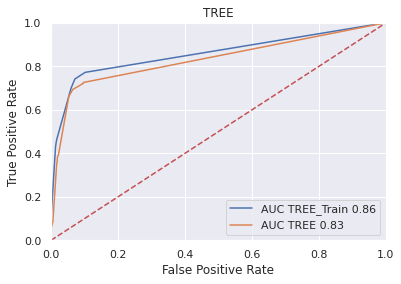

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8928271812080537
TREE  =  0.8875838926174496
------




In [46]:
print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

The ROC curve shows the accuracy of the training and testing data on predicting the probability that the loan will default. The model looks reasonable. The training set did only a little better than the testing set, so the model is not overfit.

In [51]:
# visualize the actual tree and export it as a txt file and then use graphviz to visualize
feature_cols = list( X.columns.values )
tree.export_graphviz(CLM,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )

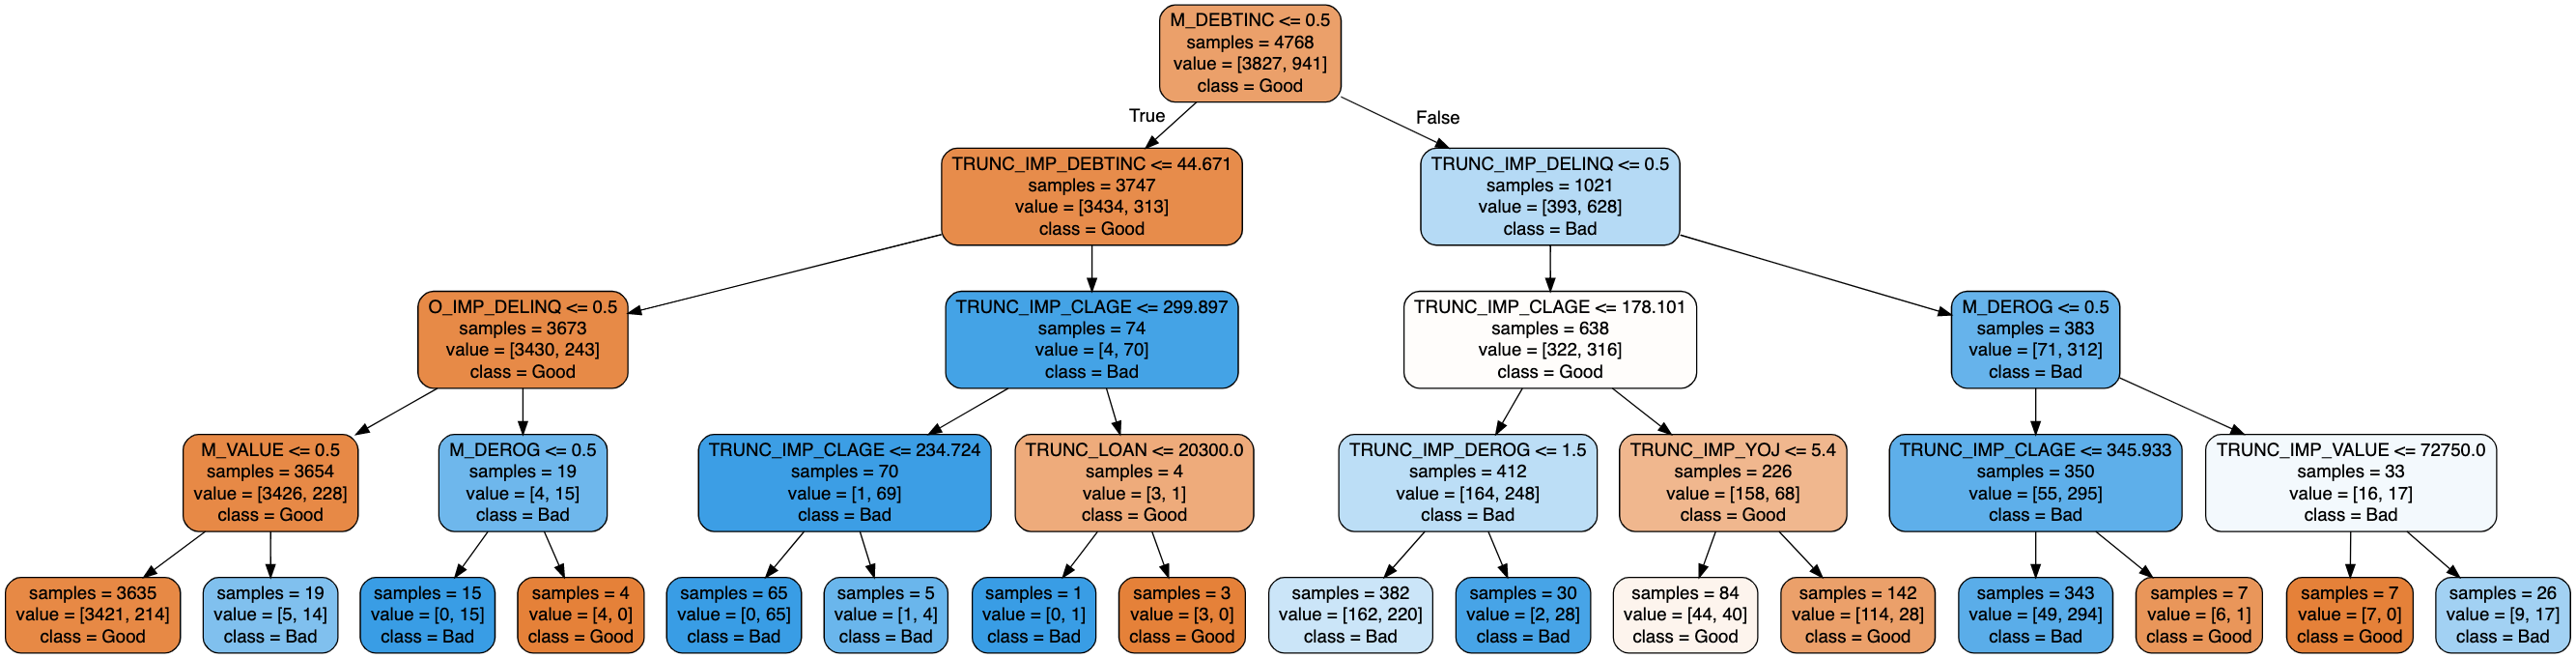

From first glance, the decision tree diagram for whether someone’s loan defaults looks like it makes sense because the colors generally get more concentrated/darker to the bottom. 

At the top, the value [3827, 941] means that 3827 people did not have their loans default and 941 did so 20% that had their loan default. The attribute of M_DEBTINC, is the first to be used to split the data depending on whether the debt-to-income ratio missing or not where less than 0.5 is missing and greater than 0.5 is not missing.  The split puts those 3827 users that do not have a missing debt-to-income ratio in the class of Good, so these users have a higher chance of not having their loan default. This split makes sense since those who have higher debt-to-income ratio may tend to be riskier and less likely able to pay their bills, so they did not want to write it in when applying for the loan.

The other splits and variables used to split make sense in deciding if the user is more likely to have their loan default or not. 


In [52]:
vars_tree_flag = getTreeVars( CLM, feature_cols ) 
for i in vars_tree_flag :
    print(i)

M_VALUE
M_DEROG
M_DEBTINC
TRUNC_LOAN
TRUNC_IMP_VALUE
TRUNC_IMP_YOJ
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_DEBTINC


These variables were used in the tree, and therefore, the most predictive of loan default. These variables make sense in splitting the data into the two classes.

#### Loss Amount

In [48]:
AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

TREE RMSE ACCURACY
TREE_Train  =  4587.556685671267
TREE  =  5763.9837632219205
------




In [49]:
feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()

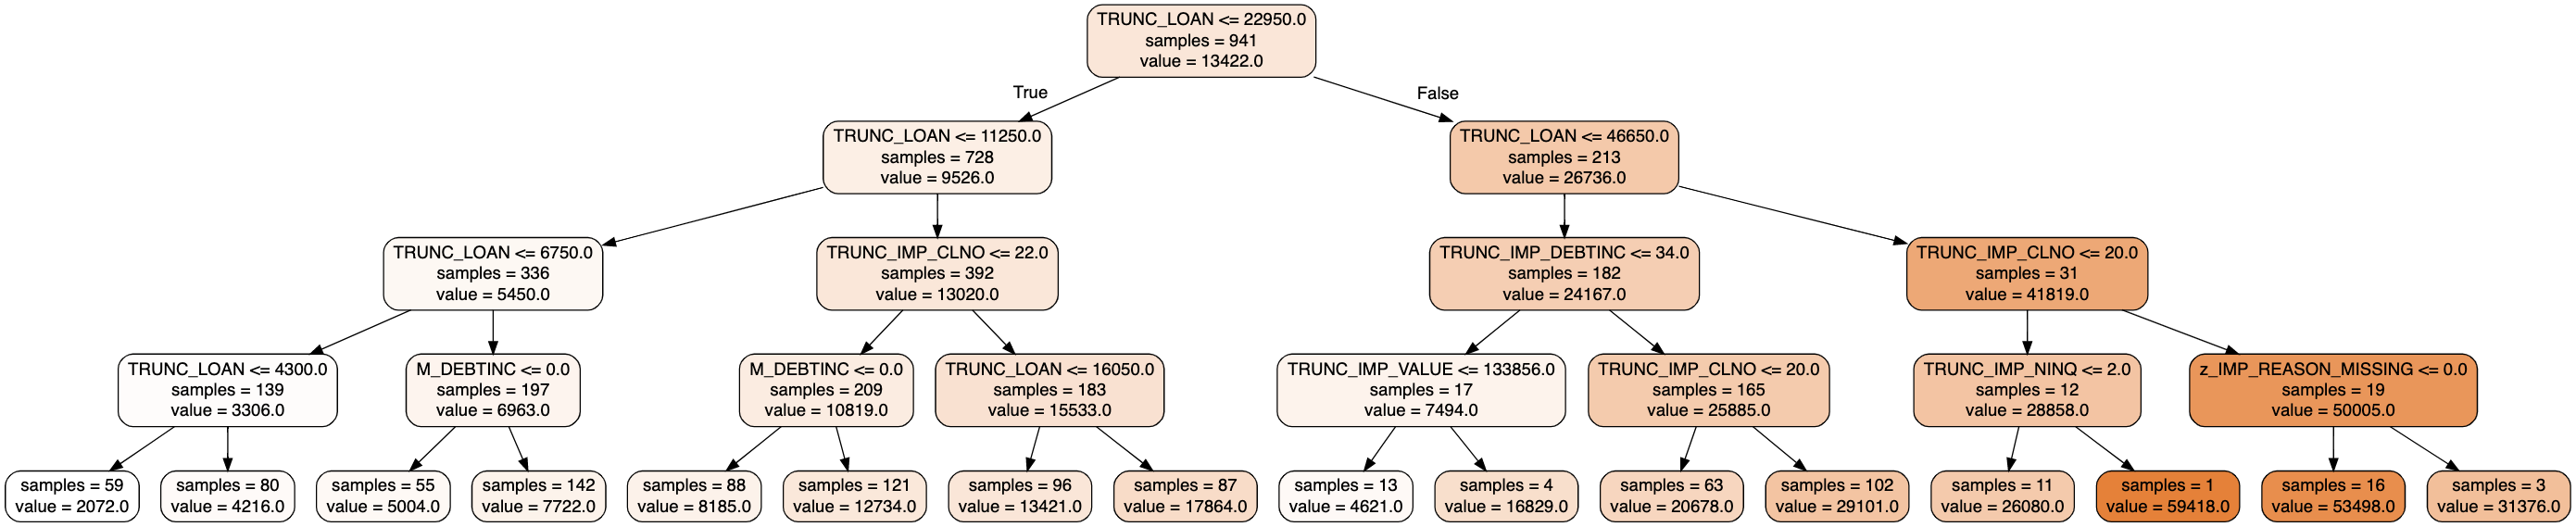

In [53]:
vars_tree_loss = getTreeVars( AMT, feature_cols ) 
for i in vars_tree_loss:
    print(i)

M_DEBTINC
TRUNC_LOAN
TRUNC_IMP_VALUE
TRUNC_IMP_NINQ
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
z_IMP_REASON_MISSING


LOAN refers to the credit line. The greater the value the larger the loss amount and vice versa, which makes sense as a larger loan will result in a larger loss amount when defaulted. LOAN is then used again to split the data and a few other times as well, so LOAN seems to be the most predictive in the loss amount. The other variables also make sense in its use for predicting loss amount.

### Random Forest

In [57]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

#### Loan Default Probability

In [58]:
WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 25, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

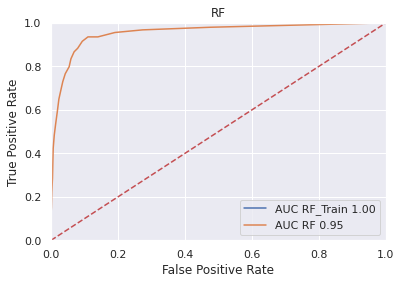

RF CLASSIFICATION ACCURACY
RF_Train  =  0.9989513422818792
RF  =  0.912751677852349
------




In [59]:
print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

The Random Forest area under the curve for the testing data set, 0.91, is greater than that of the decision tree, 0.89. The Random Forest test data had a higher accuracy than that of the Decision Tree test data. The Random Forest did better in predicting the loan default probability.

In [60]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_RF_flag :
    print( i )

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 86)
('TRUNC_IMP_CLAGE', 52)
('TRUNC_IMP_DELINQ', 46)
('TRUNC_LOAN', 44)
('TRUNC_IMP_VALUE', 42)
('TRUNC_IMP_CLNO', 39)
('TRUNC_IMP_MORTDUE', 36)
('TRUNC_IMP_YOJ', 33)
('TRUNC_IMP_DEROG', 25)
('TRUNC_IMP_NINQ', 22)


#### Loss Amount

In [61]:
AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

RF RMSE ACCURACY
RF_Train  =  1312.483481923041
RF  =  3493.232396924514
------




The RMSE using the Random Forest model was more accurate than when using the Decision Tree.


In [62]:
feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 13)
('TRUNC_IMP_DEBTINC', 5)
('M_DEBTINC', 4)
('TRUNC_IMP_CLAGE', 3)


In [63]:
RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

### Gradient Boosting

#### Loan Default Probability

In [64]:
WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

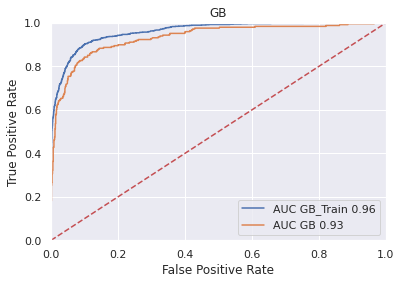

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9238674496644296
GB  =  0.9060402684563759
------




In [65]:
print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

Its AUC is 0.93, so it does better than the Decision Tree test data set but not as well as the Random Forest's.

In [70]:
feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_GB_flag :
    print( i )

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 29)
('TRUNC_IMP_DELINQ', 16)
('TRUNC_IMP_CLAGE', 14)
('TRUNC_IMP_DEROG', 7)
('M_VALUE', 7)


#### Loss Amount

In [67]:
AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

GB RMSE ACCURACY
GB_Train  =  1245.4603241383122
GB  =  2701.335762293734
------




The accuracy for the testing data for Gradient Boosting is better than the accuracy for the testing data for Random Forest and Decision Tree.

In [71]:
feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_GB_amt :
    print( i )

('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 14)
('TRUNC_IMP_DEBTINC', 6)
('M_DEBTINC', 5)
('TRUNC_IMP_CLAGE', 4)


In [72]:
GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

### Compare Tree Based Models

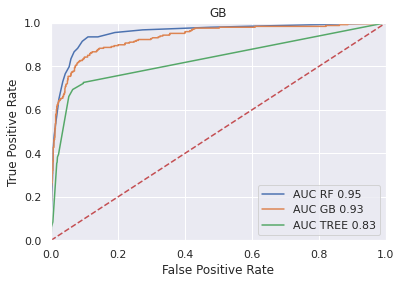

ALL CLASSIFICATION ACCURACY
RF  =  0.912751677852349
GB  =  0.9060402684563759
TREE  =  0.8875838926174496
------




In [73]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )

Random Forest is the most accurate, but Gradient Boosting is a close second, for predicting loan default probability. 

It is noted that RF did use more variables than GB.


In [36]:
ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

ALL DAMAGE MODEL ACCURACY
GB  =  2701.335762293734
RF  =  3493.232396924514
TREE  =  5713.237610480276
------




Gradient Boosting has the lowest the Root Mean Square and thus, the most accurate in predicting the loss amount.

## Regression Models

### Functions for Logit and Linear Regression Models

In [37]:
def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nLOAN DEFAULT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSS AMOUNT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

### Regression All Variables

#### Loan Default Probability

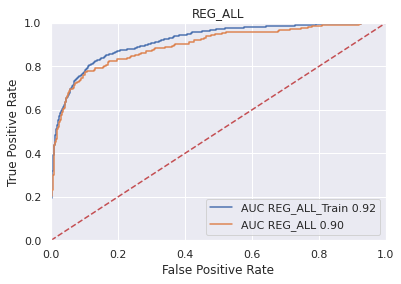

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.893246644295302
REG_ALL  =  0.886744966442953
------




In [74]:
WHO = "REG_ALL"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [75]:
AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  3555.90846939125
REG_ALL  =  3615.1006384154475
------




In [77]:
varNames = list( X_train.columns.values )

REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  38
INTERCEPT  =  -5.292901462631375
M_MORTDUE  =  0.16193453625260115
M_VALUE  =  3.7298446788980444
M_YOJ  =  -0.6280475764200538
M_DEROG  =  -1.7617392655070252
M_DELINQ  =  -0.1724408779452353
M_CLAGE  =  1.049792297254222
M_NINQ  =  -0.1694662470733477
M_CLNO  =  2.0899305253185507
M_DEBTINC  =  2.641279634064979
O_LOAN  =  -0.19171632440161382
TRUNC_LOAN  =  -2.0019712441227337e-06
O_IMP_MORTDUE  =  -0.11582098298466263
TRUNC_IMP_MORTDUE  =  -1.3097416956490628e-06
O_IMP_VALUE  =  1.0136126220387494
TRUNC_IMP_VALUE  =  3.674078449789574e-07
O_IMP_YOJ  =  0.7002683403076779
TRUNC_IMP_YOJ  =  -0.01588898497382185
O_IMP_DEROG  =  0.5134566804352095
TRUNC_IMP_DEROG  =  0.5763311499689343
O_IMP_DELINQ  =  1.8556230176994646
TRUNC_IMP_DELINQ  =  0.7518358305794541
O_IMP_CLAGE  =  0.7542387142204481
TRUNC_IMP_CLAGE  =  -0.006252804662096679
O_IMP_NINQ  =  -0.14136708520125033
TRUNC_IMP_NINQ  =  0.1736222439895759
O_IMP_CLNO  =  0.8404440363268181

### Regression Decision Tree

#### Loan Default Probability

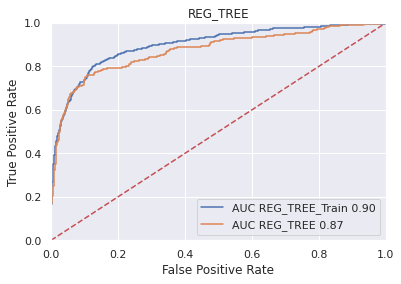

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8859060402684564
REG_TREE  =  0.8850671140939598
------




In [78]:
WHO = "REG_TREE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [79]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_TREE RMSE ACCURACY
REG_TREE_Train  =  4570.988960768496
REG_TREE  =  5114.691809257735
------




In [81]:
varNames = list( X_train.columns.values )

REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  12
INTERCEPT  =  -5.197876946306296
M_VALUE  =  3.7394377492559236
M_DEROG  =  -0.8037473045564942
M_DEBTINC  =  2.735187768238991
TRUNC_LOAN  =  -4.9772723927202435e-06
TRUNC_IMP_VALUE  =  -3.8128902985955264e-07
TRUNC_IMP_YOJ  =  -0.015289175054260236
TRUNC_IMP_DEROG  =  0.6878012283892604
O_IMP_DELINQ  =  2.106925054881397
TRUNC_IMP_DELINQ  =  0.618338703825637
TRUNC_IMP_CLAGE  =  -0.006540539420165893
TRUNC_IMP_DEBTINC  =  0.10454983943336163

LOSS AMOUNT
---------
Total Variables:  8
INTERCEPT  =  -17164.997390951918
M_DEBTINC  =  5746.033837620172
TRUNC_LOAN  =  0.778397123660128
TRUNC_IMP_VALUE  =  -0.0010620782485631919
TRUNC_IMP_NINQ  =  149.36644846188082
TRUNC_IMP_CLNO  =  245.29707317058677
TRUNC_IMP_DEBTINC  =  234.57549802206483
z_IMP_REASON_MISSING  =  -433.04907151791514


### Regression Random Forest

#### Loan Default Probability

In [90]:
WHO = "REG_RF"

RF_flag = []
for i in vars_RF_flag :
    theVar = i[0]
    RF_flag.append( theVar )
print(RF_flag)

print("\n")
RF_amt = []
for i in vars_RF_amt :
    theVar = i[0]
    RF_amt.append( theVar )
print(RF_amt)

['M_DEBTINC', 'TRUNC_IMP_DEBTINC', 'TRUNC_IMP_CLAGE', 'TRUNC_IMP_DELINQ', 'TRUNC_LOAN', 'TRUNC_IMP_VALUE', 'TRUNC_IMP_CLNO', 'TRUNC_IMP_MORTDUE', 'TRUNC_IMP_YOJ', 'TRUNC_IMP_DEROG', 'TRUNC_IMP_NINQ']


['TRUNC_LOAN', 'TRUNC_IMP_CLNO', 'TRUNC_IMP_DEBTINC', 'M_DEBTINC', 'TRUNC_IMP_CLAGE']


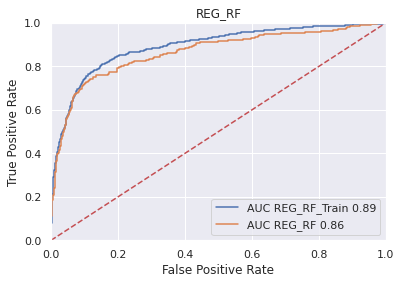

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8756291946308725
REG_RF  =  0.8682885906040269
------




In [91]:
CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [84]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_RF RMSE ACCURACY
REG_RF_Train  =  4238.056494916955
REG_RF  =  4834.631645572037
------




In [85]:
REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  12
INTERCEPT  =  -5.015782899097662
M_DEBTINC  =  2.7365109795105216
TRUNC_IMP_DEBTINC  =  0.0969699801248055
TRUNC_IMP_CLAGE  =  -0.005892687096814876
TRUNC_IMP_DELINQ  =  0.7326137931246428
TRUNC_LOAN  =  -2.179961401425199e-06
TRUNC_IMP_VALUE  =  4.081867715838833e-07
TRUNC_IMP_CLNO  =  -0.019576548660793936
TRUNC_IMP_MORTDUE  =  1.2728226240009494e-07
TRUNC_IMP_YOJ  =  -0.010021124715878215
TRUNC_IMP_DEROG  =  0.7199162818314336
TRUNC_IMP_NINQ  =  0.12289116102332158

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -13269.32268983198
TRUNC_LOAN  =  0.7957096877509182
TRUNC_IMP_CLNO  =  295.8661953290626
TRUNC_IMP_DEBTINC  =  198.11601519151253
M_DEBTINC  =  5813.596604342743
TRUNC_IMP_CLAGE  =  -25.630387984063304


### Regression Gradient Boosting

#### Loan Default Probability

In [92]:
WHO = "REG_GB"

GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )

('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 29)
('TRUNC_IMP_DELINQ', 16)
('TRUNC_IMP_CLAGE', 14)
('TRUNC_IMP_DEROG', 7)
('M_VALUE', 7)



('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 14)
('TRUNC_IMP_DEBTINC', 6)
('M_DEBTINC', 5)
('TRUNC_IMP_CLAGE', 4)


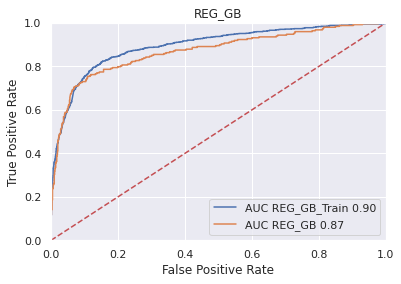

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.881501677852349
REG_GB  =  0.8800335570469798
------




In [93]:
CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [94]:
AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB RMSE ACCURACY
REG_GB_Train  =  4238.056494916955
REG_GB  =  4834.631645572037
------




In [95]:
REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  7
INTERCEPT  =  -5.459346896034155
M_DEBTINC  =  2.74178505259315
TRUNC_IMP_DEBTINC  =  0.1035527283695994
TRUNC_IMP_DELINQ  =  0.6771424927529502
TRUNC_IMP_CLAGE  =  -0.00690570375364617
TRUNC_IMP_DEROG  =  0.7499394442323485
M_VALUE  =  3.5351803176936993

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -13269.32268983198
TRUNC_LOAN  =  0.7957096877509182
TRUNC_IMP_CLNO  =  295.8661953290626
TRUNC_IMP_DEBTINC  =  198.11601519151253
M_DEBTINC  =  5813.596604342743
TRUNC_IMP_CLAGE  =  -25.630387984063304


### Regression Stepwise

In [185]:
U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]
print(maxCols)

sfs = SFS(LogisticRegression( solver='newton-cg', max_iter=100 ), 
          n_features_to_select=None, direction='forward', scoring='accuracy', cv=3)

11


In [181]:
sfs.fit(U_train.values, Y_train[ TARGET_FLAG ].values)

SequentialFeatureSelector(cv=3,
                          estimator=LogisticRegression(solver='newton-cg'),
                          scoring='accuracy')

In [182]:
feature_select = U_train.columns[sfs.get_support()]
feature_select

Index(['M_VALUE', 'M_DEBTINC', 'TRUNC_IMP_DEROG', 'TRUNC_IMP_DELINQ',
       'TRUNC_IMP_CLAGE'],
      dtype='object')

In [183]:
U_train = X_train[feature_select]
U_test = X_test[feature_select]

In [186]:
V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(), n_features_to_select=None, direction='forward', scoring='r2', cv=5)

sfs.fit(V_train.values, Z_train[ TARGET_LOSS ].values)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

In [187]:
feature_select = V_train.columns[sfs.get_support()]
feature_select

Index(['TRUNC_LOAN', 'TRUNC_IMP_CLNO'], dtype='object')

In [188]:
V_train = W_train[feature_select]
V_test = W_test[feature_select]

#### Loan Default Probability

In [190]:
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_FLAG ] )

ValueError: ignored

In [ ]:
#TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_FLAG ] )
#TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_FLAG ] )
#U_train = X_train[ vars_tree_flag ]

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [173]:
AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, X_test[ vars_tree_loss ], Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

ValueError: ignored

In [ ]:
REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  10
INTERCEPT  =  -5.353530813656673
TRUNC_IMP_CLAGE  =  -0.006837020088604123
TRUNC_M_DEBTINC  =  2.744201933282898
TRUNC_IMP_DEBTINC  =  0.10528069849571041
O_M_VALUE  =  3.709820349727899
TRUNC_IMP_VALUE  =  -8.007909005536421e-07
TRUNC_M_DEROG  =  -0.7852268386953548
TRUNC_IMP_DEROG  =  0.6922553233448552
O_IMP_DELINQ  =  2.0537201808929995
TRUNC_IMP_DELINQ  =  0.6176089000725961

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -13269.322689831992
TRUNC_LOAN  =  0.7957096877509179
TRUNC_IMP_CLNO  =  295.8661953290628
TRUNC_IMP_DEBTINC  =  198.11601519151213
TRUNC_M_DEBTINC  =  5813.596604342766
TRUNC_IMP_CLAGE  =  -25.63038798406322


### Regression Stepwise

In [204]:
U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]
print(maxCols)

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100 ),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ TARGET_FLAG ].values)

11


SequentialFeatureSelector(cv=3,
                          estimator=LogisticRegression(solver='newton-cg'),
                          k_features=(1, 11))

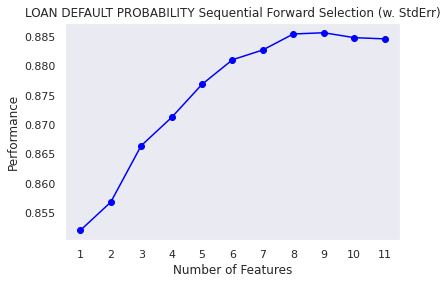

In [205]:
theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('LOAN DEFAULT PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [206]:
dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

In [207]:
print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

 ................... 
argmax
feature_names    (0, 1, 2, 4, 6, 7, 8, 9, 10)
avg_score                            0.885697
Name: 9, dtype: object
 ................... 
('0', '1', '2', '4', '6', '7', '8', '9', '10')


In [208]:
finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]

M_VALUE
M_DEROG
M_DEBTINC
TRUNC_IMP_VALUE
TRUNC_IMP_DEROG
O_IMP_DELINQ
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_DEBTINC


The variation of variables that were used in the stepwise model used variables chosen from the list of variables used in the decision tree. The stepwise found that the model with 9 out of the 11 variables used in the decision tree were most accurate in predicting loan default probabilility. 

In [209]:
V_train = W_train[ GB_amt ] #use GB variables
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ TARGET_LOSS ].values)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 5),
                          scoring='r2')

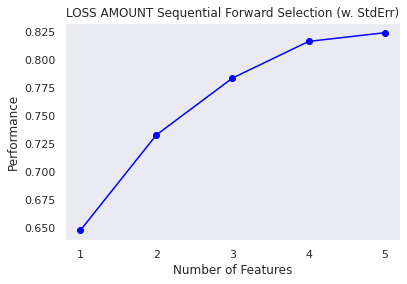

In [210]:
theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('LOSS AMOUNT Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [211]:
dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

In [212]:
print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

 ................... 
argmax
feature_names    (0, 1, 2, 3, 4)
avg_score               0.824332
Name: 5, dtype: object
 ................... 
('0', '1', '2', '3', '4')


In [213]:
finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

TRUNC_LOAN
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC
TRUNC_IMP_CLAGE


The stepwise resulted in five variables being used to result in the best accuracy.

#### Loan Default Probability

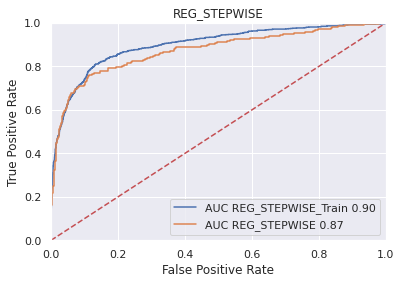

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.885486577181208
REG_STEPWISE  =  0.8842281879194631
------




In [214]:
WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_FLAG ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_FLAG ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [215]:
AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_LOSS] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_LOSS] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  4238.056494916955
REG_STEPWISE  =  4834.631645572037
------




In [216]:
REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()


LOAN DEFAULT
---------
Total Variables:  10
INTERCEPT  =  -5.335888932700627
M_VALUE  =  3.6835728368458858
M_DEROG  =  -0.7839062775733427
M_DEBTINC  =  2.7425520666293903
TRUNC_IMP_VALUE  =  -8.025698975275741e-07
TRUNC_IMP_DEROG  =  0.6914561105168818
O_IMP_DELINQ  =  2.010461978367971
TRUNC_IMP_DELINQ  =  0.6186426423379421
TRUNC_IMP_CLAGE  =  -0.006839117389090719
TRUNC_IMP_DEBTINC  =  0.10483744400417573

LOSS AMOUNT
---------
Total Variables:  6
INTERCEPT  =  -13269.32268983198
TRUNC_LOAN  =  0.7957096877509182
TRUNC_IMP_CLNO  =  295.8661953290626
TRUNC_IMP_DEBTINC  =  198.11601519151253
M_DEBTINC  =  5813.596604342743
TRUNC_IMP_CLAGE  =  -25.630387984063304


### Regression Comparison

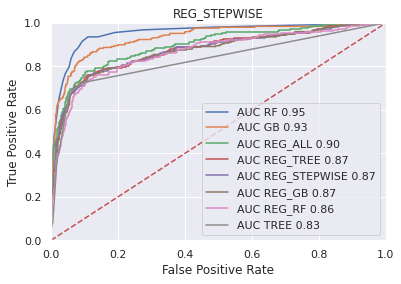

ALL CLASSIFICATION ACCURACY
RF  =  0.912751677852349
GB  =  0.9060402684563759
TREE  =  0.8875838926174496
REG_ALL  =  0.886744966442953
REG_TREE  =  0.8850671140939598
REG_STEPWISE  =  0.8842281879194631
REG_GB  =  0.8800335570469798
REG_RF  =  0.8682885906040269
------




In [217]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )

The Random Forest Classifier model was the most accurate among the other Classifier models. 

For the loan default probability regression, the model with all the variables was the most accurate, but the use of all variables is not realistic and not all variables would make sense in the model. 

If picking a regression model, I would recommend using the regression stepwise model that included 9 variables, especially as the accuracy between the regression with all variables and the regression stepwise model differed by 0.002. 

Overall, I would recommend the Random Forest model to predict loan default probability. It is easier to explain as well as had the most accurate scores.


In [ ]:
ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

ALL DAMAGE MODEL ACCURACY
GB  =  2794.947030828998
RF  =  3428.650015145327
REG_ALL  =  3615.1006384119664
REG_RF  =  4834.631645572038
REG_GB  =  4834.631645572038
REG_STEPWISE  =  4834.631645572038
REG_TREE  =  5063.987350451349
TREE  =  5713.237610480276
------




For the regression, the model with all the variables had the lowest RMSE score, so it was the most accurate. It is, again, not realistic to use all the variables, so I would recommend using the regression with the Gradient Boosting model for a regression-based model. The regression using Random Forest and Gradient Boosting have very similar RMSE values.They both use the same number of variables and have the same values for coefficients and intercept of the model. There does not seem to be any difference in these two regression models, so I recommend using either the Random Forest or Gradient Boosting regression model. The variables used all seem to make sense in predicting loss amount. 

Overall, I recommened the Gradient Boosting Classifier model due to its low RMSE value in predicting loss amount.

### Neural Network

In [219]:
theScaler = MinMaxScaler()
theScaler.fit( X_train )

MinMaxScaler()

#### Loan Default Probability

In [232]:
WHO = "Tensor_FLow"

U_train = theScaler.transform( X_train )
U_test = theScaler.transform( X_test )

U_train = pd.DataFrame( U_train )
U_test = pd.DataFrame( U_test )

U_train.columns = list( X_train.columns.values )
U_test.columns = list( X_train.columns.values )

#use the variables that RF liked 
U_train = U_train[ RF_flag ] 
U_test = U_test[ RF_flag ]

In [256]:
F_theShapeSize = U_train.shape[1]
F_theUnits = int( 2*F_theShapeSize)

In [261]:
model = models.Sequential()
model.add(layers.Dense(units=F_theUnits, activation=tf.nn.relu, input_dim=F_theShapeSize))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=F_theUnits, activation=tf.nn.relu))
model.add(layers.Dense(units=2, activation=tf.nn.softmax, name="output_layer"))

In [262]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 22)                264       
                                                                 
 dropout_5 (Dropout)         (None, 22)                0         
                                                                 
 dense_20 (Dense)            (None, 22)                506       
                                                                 
 output_layer (Dense)        (None, 2)                 46        
                                                                 
Total params: 816
Trainable params: 816
Non-trainable params: 0
_________________________________________________________________


In [263]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [264]:
%%time 

history = model.fit(U_train, Y_train[TARGET_FLAG]
                    ,epochs=50
                    ,validation_split=0.20
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)],
                   )

Epoch 1/50
120/120 [==============================] - 1s 5ms/step - loss: 0.4779 - accuracy: 0.8020 - val_loss: 0.3991 - val_accuracy: 0.7809
Epoch 2/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8477 - val_loss: 0.3429 - val_accuracy: 0.8690
Epoch 3/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8623 - val_loss: 0.3413 - val_accuracy: 0.8648
Epoch 4/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8655 - val_loss: 0.3329 - val_accuracy: 0.8648
Epoch 5/50
120/120 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8668 - val_loss: 0.3353 - val_accuracy: 0.8627
CPU times: user 2.9 s, sys: 128 ms, total: 3.02 s
Wall time: 3 s


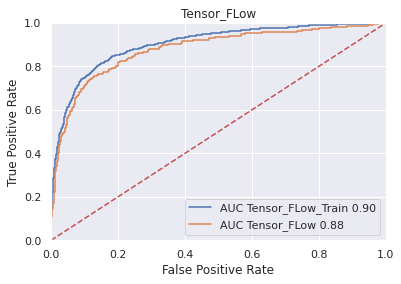

Tensor_FLow CLASSIFICATION ACCURACY
Tensor_FLow_Train  =  0.8783557046979866
Tensor_FLow  =  0.8649328859060402
------




In [266]:
TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, U_train[ RF_flag ] , Y_train[ TARGET_FLAG ] )
TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, U_test[ RF_flag ] , Y_test[ TARGET_FLAG ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

#### Loss Amount

In [267]:
V_train = theScaler.transform( W_train )
V_test = theScaler.transform( W_test )

V_train = pd.DataFrame( V_train )
V_test = pd.DataFrame( V_test )

V_train.columns = list( W_train.columns.values )
V_test.columns = list( W_train.columns.values )

V_train = V_train[ GB_amt ]
V_test = V_test[ GB_amt ]

In [268]:
A_theShapeSize = V_train.shape[1]
A_theUnits = int(2*A_theShapeSize)

In [293]:
model = models.Sequential()
model.add(layers.Dense(units=A_theUnits, activation=tf.nn.relu, input_dim=A_theShapeSize))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=2*A_theUnits, activation=tf.nn.relu))
model.add(layers.Dense(units=2, activation=tf.nn.relu, name="output_layer"))

In [289]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10)                60        
                                                                 
 dropout_12 (Dropout)        (None, 10)                0         
                                                                 
 dense_34 (Dense)            (None, 20)                220       
                                                                 
 output_layer (Dense)        (None, 2)                 42        
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [294]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [295]:
%%time 

history = model.fit(V_train, Z_train[TARGET_LOSS]
                    ,epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 293702720.0000 - accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 293696416.0000 - accuracy: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 293683840.0000 - accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 293653920.0000 - accuracy: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 293599424.0000 - accuracy: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 293506912.0000 - accuracy: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 293344928.0000 - accuracy: 0.0000e+00
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 293115200.0000 - accuracy: 0.0000e+00
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 292790624.0000 - accuracy: 0.0000e+00
E

In [296]:
TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train[GB_amt], Z_train[TARGET_LOSS] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test[GB_amt], Z_test[TARGET_LOSS] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

TF_CLM = TEST_CLM.copy()
TF_AMT = TEST_AMT.copy()

Tensor_FLow RMSE ACCURACY
Tensor_FLow_Train  =  24932.719055291822
Tensor_FLow  =  25405.776845034383
------




### Comparison of Models

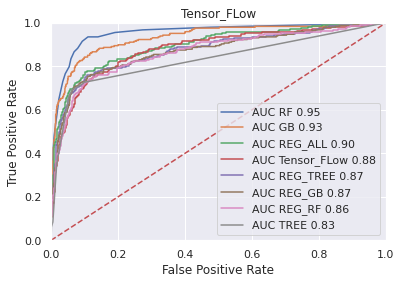

ALL CLASSIFICATION ACCURACY
RF  =  0.912751677852349
GB  =  0.9060402684563759
TREE  =  0.8875838926174496
REG_ALL  =  0.886744966442953
REG_TREE  =  0.8850671140939598
REG_GB  =  0.8800335570469798
REG_RF  =  0.8682885906040269
Tensor_FLow  =  0.8649328859060402
------


ALL DAMAGE MODEL ACCURACY
GB  =  2701.335762293734
RF  =  3493.232396924514
REG_ALL  =  3615.1006384154475
REG_RF  =  4834.631645572037
REG_GB  =  4834.631645572037
REG_TREE  =  5114.691809257735
TREE  =  5763.9837632219205
Tensor_FLow  =  25405.776845034383
------




In [297]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, TF_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )

ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, TF_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL DAMAGE MODEL ACCURACY", ALL_AMT )

The most accurate model is Random Forest Classifier model. It has the best AUC and accuracy score compared to the other models. The model with the lowest RMSE score is the Gradient Boosting Classifier model. 